Notebook for Titanic Competition, 
you can find the data and more detailed informations here:
[https://www.kaggle.com/c/titanic](http://)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Inspecting Data

In [2]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

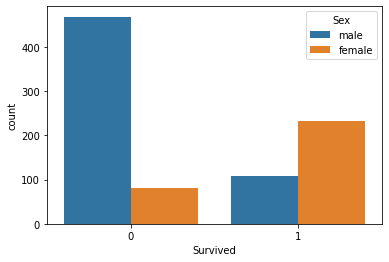

In [4]:
sns.countplot(data.Survived, hue=data.Sex)

Most of the survivors are female

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

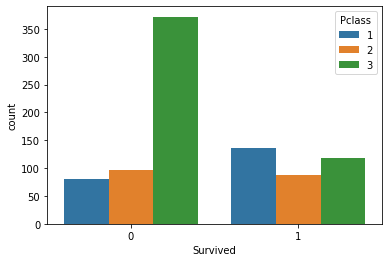

In [5]:
sns.countplot(data.Survived, hue=data.Pclass)

Most of the people that using class 3 didn't survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

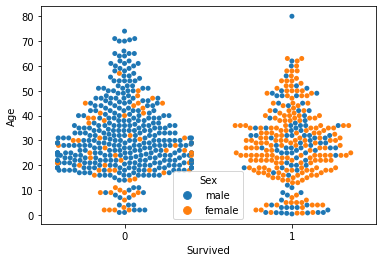

In [6]:
sns.swarmplot(y='Age', x='Survived', hue='Sex', data=data)

Toddlers most likely survived

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

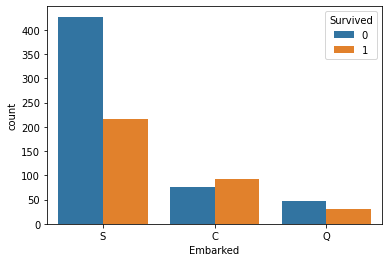

In [7]:
sns.countplot(data.Embarked, hue=data.Survived)

can't tell much

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

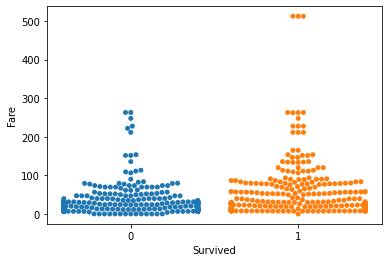

In [8]:
sns.swarmplot(x="Survived", y="Fare", data=data)

Passengers with higher fares are more likely survived

# Data Cleaning and Manipulation

Replace null with another value

In [9]:
data.Cabin = data.Cabin.fillna('Z')

Get the first letter of the cabin, it seems there are representing the position in the ship, it probably can be helpful

In [10]:
cabin_code = [x[0] for x in data.Cabin]

add cabin code into the dataframe

In [11]:
data["Cabin_code"] = cabin_code
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,Z


Dropping unnecesary columns

In [12]:
train = data
train.drop(["Name", "PassengerId"], axis = 1, inplace=True)

In [13]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Z,S,Z
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Z
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,male,35.0,0,0,373450,8.0500,Z,S,Z
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,Z,S,Z
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,B
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,Z,S,Z
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,C


Inspecting the Ticket column

In [14]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
4135        1
243880      1
2664        1
350046      1
240929      1
Name: Ticket, Length: 681, dtype: int64

In [15]:
train[train.Survived == 1].Ticket.value_counts()

1601          5
2666          4
113760        4
17421         3
347077        3
             ..
C.A. 29395    1
PC 17585      1
PC 17603      1
2677          1
230434        1
Name: Ticket, Length: 260, dtype: int64

It's pretty hard to tell, there are several similar tickets but not that much, I'm going to drop the column

Now, Let's inspect SibSp and Parch

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

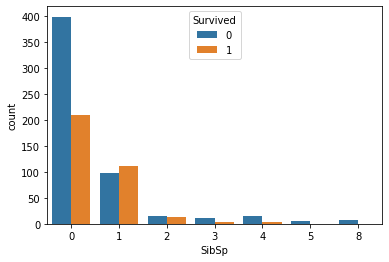

In [16]:
sns.countplot(train.SibSp, hue=train.Survived)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

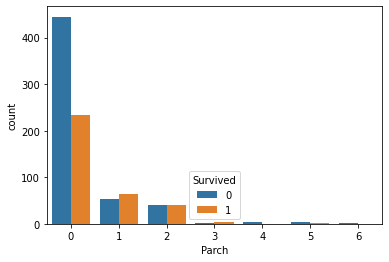

In [17]:
sns.countplot(train.Parch, hue=train.Survived)

It seems that the number of the family member on the ship doesn't affect the survival rate, I'm going to drop these columns

In [18]:
train.drop(["Ticket", "SibSp", "Parch", "Cabin"], axis = 1, inplace=True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_code
0,0,3,male,22.0,7.2500,S,Z
1,1,1,female,38.0,71.2833,C,C
2,1,3,female,26.0,7.9250,S,Z
3,1,1,female,35.0,53.1000,S,C
4,0,3,male,35.0,8.0500,S,Z


Since Embarked and Cabin code is categorical, we can make dummies to represent them

In [20]:
dummies = pd.get_dummies(train[["Embarked", "Cabin_code"]])
dummies

,Embarked_C,Embarked_Q,Embarked_S,Cabin_code_A,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_T,Cabin_code_Z
0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,0,0,0,0,1
887,0,0,1,0,1,0,0,0,0,0,0,0
888,0,0,1,0,0,0,0,0,0,0,0,1
889,1,0,0,0,0,1,0,0,0,0,0,0


replace Embarked and Cabin_code with dummies

In [21]:
train.drop(["Embarked", "Cabin_code"], axis = 1, inplace=True)

In [22]:
train = pd.concat([train,dummies], axis=1)

Replacing gender with number, 1 for female, and 0 for male

In [24]:
train.Sex = train.Sex.apply(lambda x: 1 if x == "female" else 0)


In [46]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_code_A,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_T,Cabin_code_Z
0,0,3,0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,1,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


Let's see the correlation between columns

<AxesSubplot:>

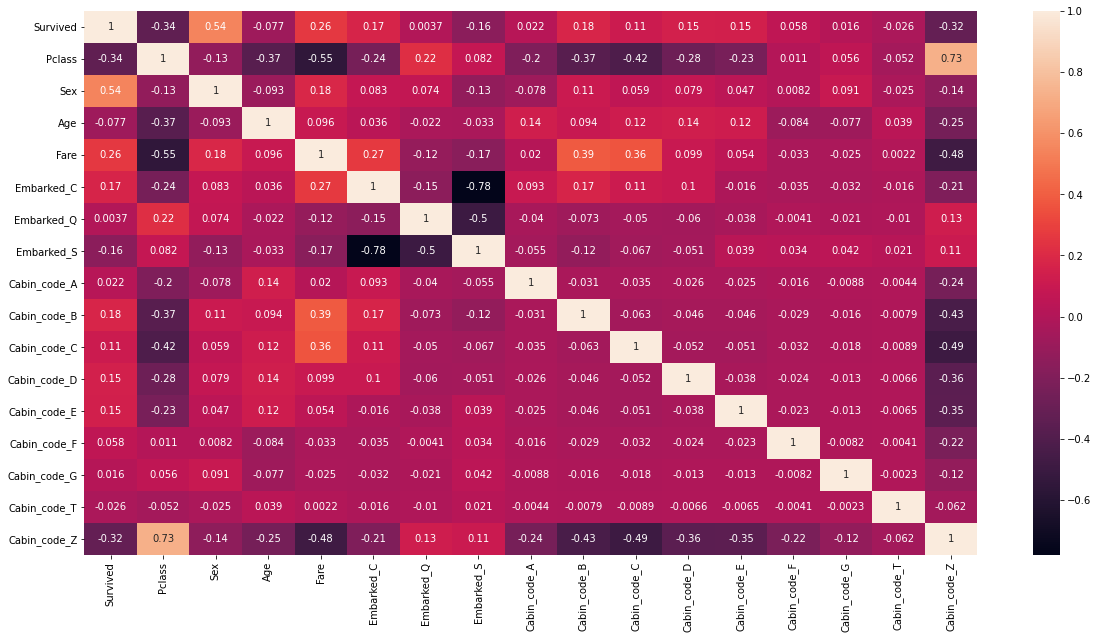

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot=True)

There's still Null on Age, we have to replace them with certain value like mean or median

In [26]:
train.isna().any()

Survived        False
Pclass          False
Sex             False
Age              True
Fare            False
Embarked_C      False
Embarked_Q      False
Embarked_S      False
Cabin_code_A    False
Cabin_code_B    False
Cabin_code_C    False
Cabin_code_D    False
Cabin_code_E    False
Cabin_code_F    False
Cabin_code_G    False
Cabin_code_T    False
Cabin_code_Z    False
dtype: bool

In [27]:
train.Age = train.Age.fillna(train.Age.mean())

# Preparing the test data

Preprocessing the test data with what we did on the train data

In [29]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket"], axis = 1, inplace = True)

In [31]:
test.Sex = test.Sex.apply(lambda x: 1 if x == "female" else 0)

In [32]:
test.Age = test.Age.fillna(test.Age.mean())

In [33]:
test.Cabin = test.Cabin.fillna("Z")
test["Cabin_code"] = [x[0] for x in test.Cabin]
test_dummies = pd.get_dummies(test[["Embarked", "Cabin_code"]])
test = pd.concat([test, test_dummies], axis=1)
test.drop(["Cabin", "Embarked", "Cabin_code"], axis=1, inplace=True)
test.Fare = test.Fare.fillna(test.Fare.median())
test.isna().any()

Pclass          False
Sex             False
Age             False
Fare            False
Embarked_C      False
Embarked_Q      False
Embarked_S      False
Cabin_code_A    False
Cabin_code_B    False
Cabin_code_C    False
Cabin_code_D    False
Cabin_code_E    False
Cabin_code_F    False
Cabin_code_G    False
Cabin_code_Z    False
dtype: bool

There's a missing column because there's no T cabin code in test data, so we have to add an extra column manually

In [34]:
T = test.Cabin_code_Z.apply(lambda x: x * 0)
T.shape

(418,)

In [35]:
temp = test

In [36]:
temp.insert(loc=14, column="Cabin_code_T",value = T)

In [37]:
temp.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_code_A,Cabin_code_B,Cabin_code_C,Cabin_code_D,Cabin_code_E,Cabin_code_F,Cabin_code_G,Cabin_code_T,Cabin_code_Z
0,3,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,0,1
1,3,1,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,0,1
2,2,0,62.0,9.6875,0,1,0,0,0,0,0,0,0,0,0,1
3,3,0,27.0,8.6625,0,0,1,0,0,0,0,0,0,0,0,1
4,3,1,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,0,1


In [38]:
test = temp

# Modelling

Logistic Regression: 0.77272

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logR = LogisticRegression()

X = train.drop("Survived", axis = 1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logR.fit(X_train,y_train)
logR.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7597765363128491

In [39]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission.Survived = logR.predict(test)

In [40]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
submission.to_csv("LogR prediction.csv", index=False)

Random Forest: 0.78229

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf.score(X_train, y_train)

0.8230337078651685

In [43]:
submission_rf = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission_rf.Survived = rf.predict(test)
submission_rf.to_csv("RF prediction.csv", index=False)

Gradient Boosting: 0.77751 

In [44]:

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.06, n_estimators = 100,validation_fraction = 0.2, n_iter_no_change=100)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.8044692737430168

In [45]:
submission_gb = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission_gb.Survived = gb.predict(test)
submission_gb.to_csv("GB prediction.csv", index=False)

That's it for today, there are still a lot of things to improve